In [34]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.ticker import ScalarFormatter
import pickle 

from include.build_synth import buildData_from_countries as generator
from include.load_data.get_counts import get_real_counts
from RL_estim import joint_estimation as je
from RL_estim import R_epiEstim as RtepiEstim

from utils import *

from importlib import reload
reload

np.random.seed(2025)

plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsmath,amsfonts}')

fs = 14
plt.rcParams.update({
    'figure.figsize': (6,4),
    "text.usetex": True,
    "font.family": "roman",
    "font.size": fs,
    'axes.labelsize': fs,
    'axes.titlesize': fs*1.2,
    'xtick.labelsize': fs,
    'ytick.labelsize': fs,

})

fig_folder = "C:/Users/adminuser/Documents/Github/2026-icassp-graph/figures/"

In [2]:
##############
# Get Z data #
##############

path="C:/Users/adminuser/Documents/GitHub/Covid_R_L_estim/" # path to project folder

# set time and places
firstDay, lastDay = "2020-09-01", "2021-01-01"
countries = [
    "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", 
    "Croatia", "Czechia", "Denmark", "France", "Germany", "Greece", 
    "Hungary", "Ireland", "Italy",     "Kosovo", "Latvia", "Lithuania", 
    "Luxembourg", "Moldova", "Netherlands", "North Macedonia", "Norway", 
    "Poland", "Portugal", "Romania", "Serbia", "Slovakia", "Slovenia", 
    "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", 
    "Algeria", "Egypt", "Libya", "Morocco", "Tunisia", "Turkey"
]

# extract daily new COVID-19 infection counts
Zs = []
for c in countries:
    ZData, options = get_real_counts(c, firstDay, lastDay, 'JHU', path)
    Zs.append(ZData)
Zs = np.array(Zs)
optionsZ = options

C = len(Zs) # number of countries

Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins University.
Opening data from Johns Hopkins 

Text(0, 0.5, '$\\boldsymbol{\\mathsf{Z}}$')

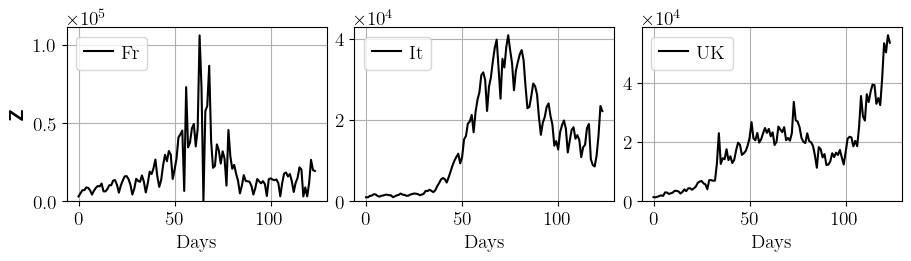

In [4]:
# plot the count time series of a few countries
subset = ["France", "Italy", "United Kingdom"]
name_subset = ["Fr", "It", "UK"]
n = len(subset)


fig, axs = plt.subplots(1,n,figsize=(3*n,2.5), constrained_layout=True)
for ax, c_name, Z in zip(axs, name_subset, Zs[np.isin(countries, subset)]):
    ax.plot(Z, "k-", label=f"{c_name}")
    ax.legend(loc="upper left", handlelength=1.5,handletextpad=0.4)
    ax.set_xlabel('Days')
    ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    ax.grid()
    ax.set_ylim(0)
axs[0].set_ylabel(r"$\boldsymbol{\mathsf{Z}}$")
    

In [5]:
# Compute the joint estimation of R and L with alternate optimization

max_iter = 10            # number of alternating steps
init_method = "epiEstim" # method to initialize the R estimation

lambda_T =  10           #    time regularization parameter (promoting piecewise linearity)
lambda_S = 3             # spatial regularization parameter
lambda_L = 2             # sparsity parameter (the larger the less sparse the graph)

R_est, L_est, extra = je.RL_wAO(Zs, options, max_iter, lambda_T, lambda_S, lambda_L, init_method=init_method)

    iteration 1/10
    iteration 2/10
    iteration 3/10
    iteration 4/10
    iteration 5/10
    iteration 6/10
    iteration 7/10
    iteration 8/10
    iteration 9/10
    iteration 10/10


In [8]:
#save the results to avoid computations later

Rfile = "results/R_est.pickle"
Lfile = "results/L_est.pickle"
with open(Rfile, 'wb') as handle:
    pickle.dump(R_est, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open(Lfile, 'wb') as handle:
    pickle.dump(L_est, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [10]:
#import the results if they were previously saved

Rfile = "results/R_est.pickle"
Lfile = "results/L_est.pickle"
with open(Rfile, 'rb') as handle:
    R_est = pickle.load(handle)
with open(Lfile, 'rb') as handle:
    L_est = pickle.load(handle)

['Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czechia', 'Denmark', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Kosovo', 'Latvia', 'Lithuania', 'Luxembourg', 'Moldova', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Ukraine', 'United Kingdom', 'Algeria', 'Egypt', 'Libya', 'Morocco', 'Tunisia', 'Turkey']


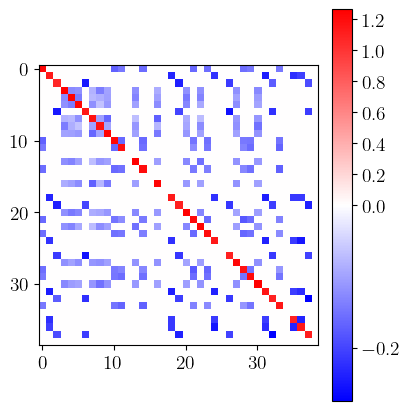

In [11]:
# plot the estimated Laplacian

min_coef = np.min(L_est)
max_coef = np.max(L_est)
norm = colors.TwoSlopeNorm(vmin=min_coef, vcenter=0, vmax=max_coef)
figL, ax = plt.subplots(1, 1, figsize=(4,4), sharex=True, sharey=True,  constrained_layout=True)
im = ax.imshow(L_est, cmap='bwr', norm=norm)
figL.colorbar(im, ax=ax, orientation='vertical')
print(countries)

10 clusters will be computed
Cluster 0:
['Austria', 'Greece', 'Hungary', 'Kosovo', 'Norway', 'Portugal', 'Spain', 'Sweden', 'Algeria']

Cluster 1:
['Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Denmark', 'France', 'Germany', 'Italy', 'Lithuania', 'North Macedonia', 'Poland', 'Slovenia', 'Switzerland']

Cluster 2:
['Belarus', 'Moldova', 'Romania', 'Ukraine', 'Libya', 'Morocco']

Cluster 3:
['Belgium', 'Czechia', 'Netherlands', 'Slovakia', 'United Kingdom', 'Tunisia']

Cluster 4:
['Latvia']

Cluster 5:
['Egypt']

Cluster 6:
['Ireland']

Cluster 7:
['Turkey']

Cluster 8:
['Luxembourg']

Cluster 9:
['Serbia']



c:\Users\adminuser\.conda\envs\LL\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


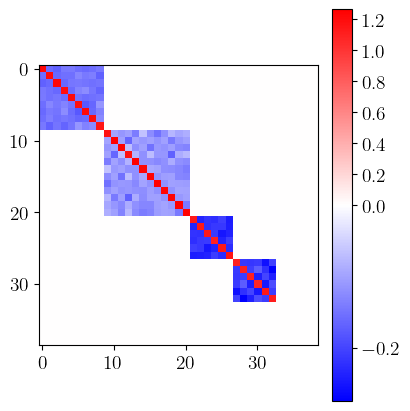

In [35]:
# cluster countries according to the laplacian 
cluster_labels, k = spectral_clustering_from_laplacian(L_est)
print_clusters(cluster_labels, countries)

# plot the estimated laplacian with rows and columns sorted by clusters
idx = np.argsort(cluster_labels)
figL, ax = plt.subplots(1, 1, figsize=(4,4), sharex=True, sharey=True,  constrained_layout=True)
im = ax.imshow(L_est[idx,:][:, idx], cmap='bwr', norm=norm)
figL.colorbar(im, ax=ax, orientation='vertical')

In [36]:
# for clarity, let us relabel the countries such that, 
# all isolated countries (ie, in a cluster of size 1) are put in cluster 0 and the other clusters are relabeled from 1.
unique, counts = np.unique(cluster_labels, return_counts=True)
isolated_clusters = unique[counts == 1]
non_isolated_clusters = unique[counts > 1]
cluster_map = {c: i+1 for i, c in enumerate(non_isolated_clusters)}
new_labels = np.array([0 if lbl in isolated_clusters else cluster_map[lbl] for lbl in cluster_labels])


In [37]:
# Modify the list of countries so that names are understood by the map tools.

mapping = {"Serbia": "Republic of Serbia"} #eg, Serbia will be changed to Republic of Serbia

new_countries = [mapping.get(c, c) for c in countries]

# countries_for_map = [
#     "Austria", 
#     "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", 
#     "Croatia", "Czechia", "Denmark",
#     "France", "Germany", "Greece", 
#     "Hungary", "Ireland", "Italy", 
#     "Kosovo", "Latvia", "Lithuania", "Luxembourg", 
#     "Moldova", "Netherlands", 
#     "North Macedonia", "Norway", "Poland", "Portugal", "Romania", 
#     "Republic of Serbia", "Slovakia", "Slovenia", 
#     "Spain", "Sweden", "Switzerland", "Ukraine", 
#     "United Kingdom", "Morocco", "Algeria", "Tunisia", "Libya", "Egypt", "Turkey"
# ]

1400000.0 -400000.0 7300000.0 5500000.0


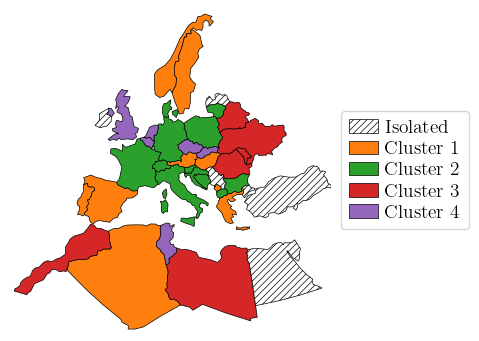

In [38]:
# plot a map of the clusters and isolated countries in hashed areas.
fig = plot_country_clusters(new_countries, new_labels)

# fig.savefig(fig_folder+"map.pdf", bbox_inches='tight')

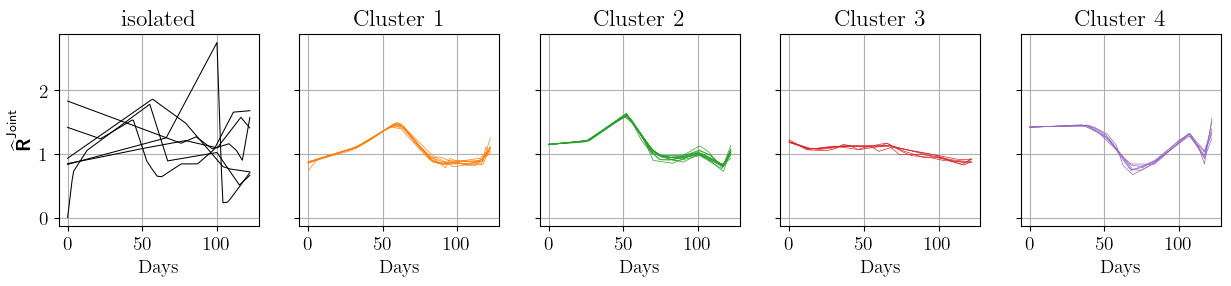

In [39]:
# plot the estimated reproduction number time series, by clusters.

cmap = "tab10"
newk = np.max(new_labels)
cluster_colors = plt.get_cmap(cmap)(np.arange(newk+1))

fig, axs = plt.subplots(1,newk+1, figsize=(3*(newk+1),2.5), sharex=True, sharey=True)
clusters_nbs = np.arange(0, newk+1) # do not show isolated countries
for i, ax in enumerate(axs.flatten()):
    for c in range(C):
        if new_labels[c]==clusters_nbs[i]:
            if i==0:
                ax.plot(R_est[c], color="k", linewidth=0.75, label=countries[c])
            else:
                ax.plot(R_est[c], color=cluster_colors[clusters_nbs[i]], linewidth=0.5, label=countries[c])
    if i==0:
        # ax.legend(loc='best', handlelength=1.5,handletextpad=0.4, borderpad=0.2)
        ax.set_title("isolated")
        ax.set_ylabel(r"$\widehat{\boldsymbol{\mathsf{R}}}^{\textsf{Joint}}$")
    else:
        ax.set_title(f"Cluster {i}")
    ax.set_xlabel("Days")
    # ax.set_ylim(0.1, 1.9)
    ax.grid()
# fig.savefig(fig_folder+"Rest_by_cluster.pdf", bbox_inches='tight')

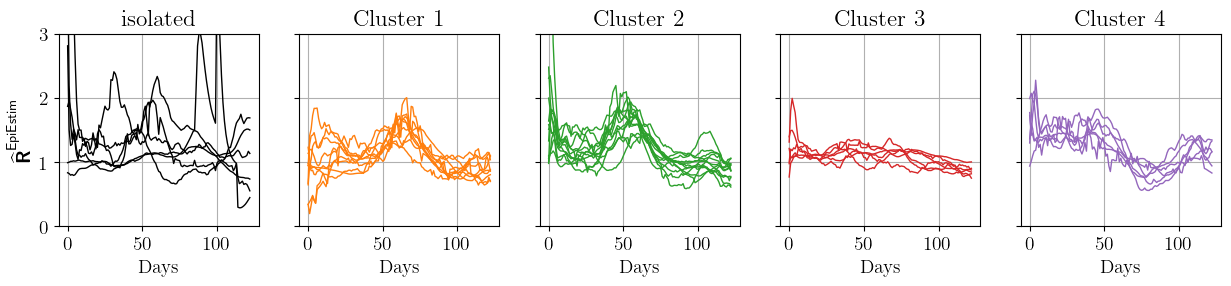

In [46]:
# same plot but with R estimated by EpiEstim.

#compute EpiEstim
R_EpiEstim = []
for i in range(len(countries)):
    R, _ = RtepiEstim.Rt_Gamma(Zs[i], tau=14, options=options)
    R_EpiEstim.append(R)

fig, axs = plt.subplots(1,newk+1, figsize=(3*(newk+1),2.5), sharex=True, sharey=True)
clusters_nbs = np.arange(0, newk+1) # do not show isolated countries
for i, ax in enumerate(axs.flatten()):
    for c in range(C):
        if new_labels[c]==clusters_nbs[i]:
            if i==0:
                ax.plot(R_EpiEstim[c], color="k", linewidth=1, label=countries[c])
            else:
                ax.plot(R_EpiEstim[c], color=cluster_colors[clusters_nbs[i]], linewidth=1, label=countries[c])
    if i==0:
        # ax.legend(loc='best', handlelength=1.5,handletextpad=0.4, borderpad=0.2)
        ax.set_title("isolated")
        ax.set_ylabel(r"$\widehat{\boldsymbol{\mathsf{R}}}^{\textsf{EpiEstim}}$")
    else:
        ax.set_title(f"Cluster {i}")
    ax.set_xlabel("Days")
    ax.set_ylim(0.0, 3.0)
    ax.grid()
# fig.savefig(fig_folder+"Rest_by_cluster.pdf", bbox_inches='tight')